In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# Specify the path to your directory
directory_path = "C:\\Users\\Subhradip Debray\\Downloads\\train"

# Walk through the directory
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        # Print the full path of each file
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score
import pickle


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
weather_data = pd.read_csv("forecast_data.csv")
location_data = pd.read_csv("location_data.csv")

In [ ]:
location_data.head()

In [5]:
import pandas as pd
import folium

# Load your data here
# location_data = pd.read_csv("path_to_your_csv")

# Filter out rows with non-numeric lat and lon values
location_data = location_data[pd.to_numeric(location_data['lat'], errors='coerce').notnull()]
location_data = location_data[pd.to_numeric(location_data['lon'], errors='coerce').notnull()]

# Convert lat and lon columns to float
location_data['lat'] = location_data['lat'].astype(float)
location_data['lon'] = location_data['lon'].astype(float)

# Verify the conversion
print(location_data.dtypes)

# Coordinates for India
INDIA_COORDINATES = [20.5937, 78.9629]

# Create a map centered around India
my_map = folium.Map(location=INDIA_COORDINATES)

# Define a function to add markers for each location
def plot_map(df):
    folium.Marker(location=[df['lat'], df['lon']], popup=df['name']).add_to(my_map)

# Apply the function to the dataframe
location_data.apply(plot_map, axis=1)

# Fit the map to the bounds of India
my_map.fit_bounds([[30.3753, 69.3451], [7.8731, 80.7718]])

# Save the map to an HTML file
my_map.save("india_map.html")

# Display the map
my_map


In [6]:
weather_data.head()

time_epoch              time  temp_c  temp_f  is_day condition  wind_mph  \
0  1716661800  26-05-2024 00:00    39.1   102.4       0     Clear      14.5   
1  1716665400  26-05-2024 01:00    38.6   101.4       0     Clear      17.4   
2  1716669000  26-05-2024 02:00    37.9   100.1       0     Clear      16.6   
3  1716672600  26-05-2024 03:00    36.8    98.2       0     Clear      15.0   
4  1716676200  26-05-2024 04:00    35.7    96.3       0     Clear      16.1   

   wind_kph  wind_degree wind_dir  ...  will_it_snow  chance_of_snow  vis_km  \
0      23.4          288      WNW  ...             0               0      10   
1      28.1          294      WNW  ...             0               0      10   
2      26.6          303      WNW  ...             0               0      10   
3      24.1          300      WNW  ...             0               0      10   
4      25.9          294      WNW  ...             0               0      10   

   vis_miles  gust_mph  gust_kph           state       city  snow_cm  uv  
0          6      22.1      35.6  Andhra Pradesh  Amaravati      0.0   1  
1          6      25.1      40.4  Andhra Pradesh  Amaravati      0.0   1  
2          6      22.5      36.1  Andhra Pradesh  Amaravati      0.0   1  
3          6      20.7      33.3  Andhra Pradesh  Amaravati      0.0   1  
4          6      22.0      35.4  Andhra Pradesh  Amaravati      0.0   1  

[5 rows x 36 columns]

Index(['time_epoch', 'time', 'temp_c', 'temp_f', 'is_day', 'condition',
       'wind_mph', 'wind_kph', 'wind_degree', 'wind_dir', 'pressure_mb',
       'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feelslike_c', 'feelslike_f', 'windchill_c', 'windchill_f',
       'heatindex_c', 'heatindex_f', 'dewpoint_c', 'dewpoint_f',
       'will_it_rain', 'chance_of_rain', 'will_it_snow', 'chance_of_snow',
       'vis_km', 'vis_miles', 'gust_mph', 'gust_kph', 'state', 'city',
       'snow_cm', 'uv'],
      dtype='object')


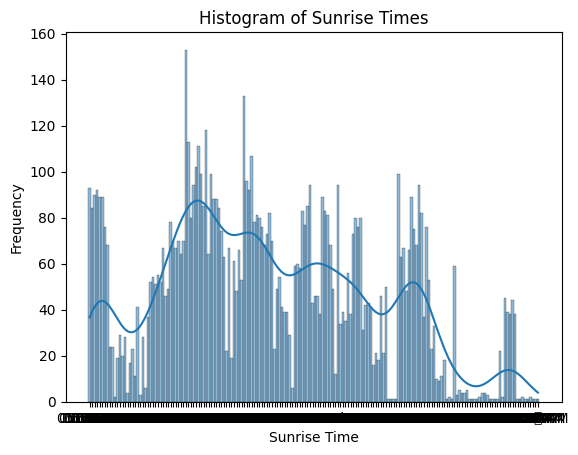

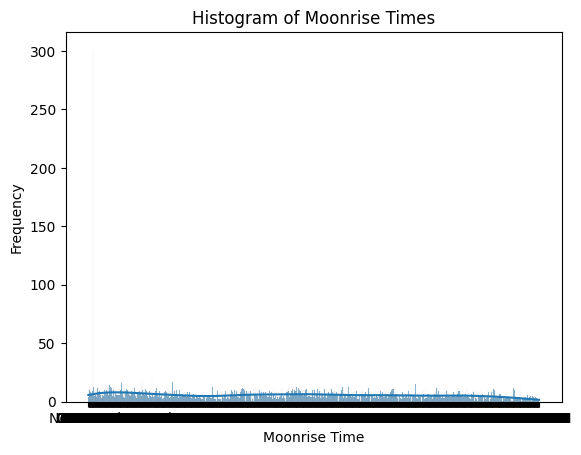

19200    -4.0
19201    -4.0
19202    -4.7
19203    -5.1
19204    -5.3
         ... 
186847   -2.7
186848   -2.2
186862   -0.7
186863   -0.9
186963   -0.1
Name: temp_c, Length: 260, dtype: float64


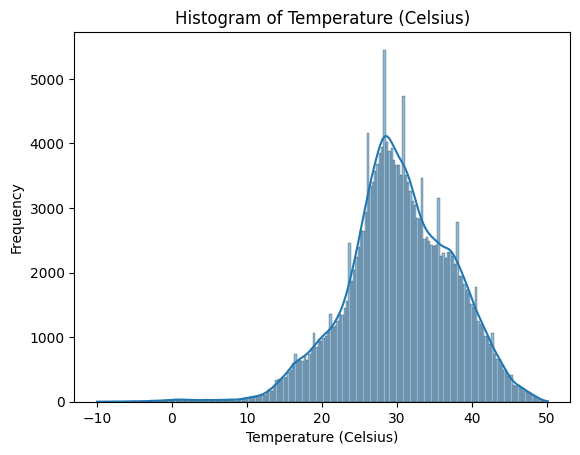

Series([], Name: precip_mm, dtype: float64)


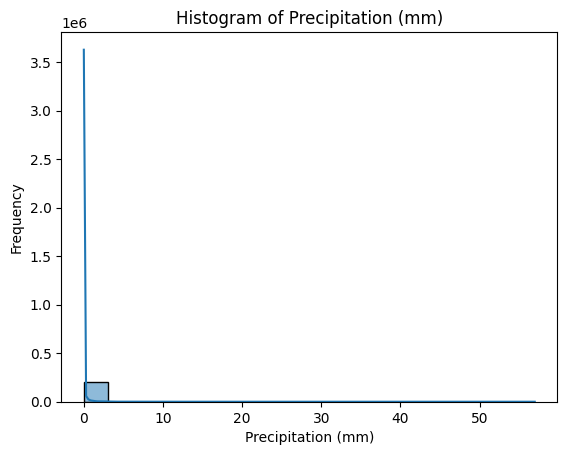

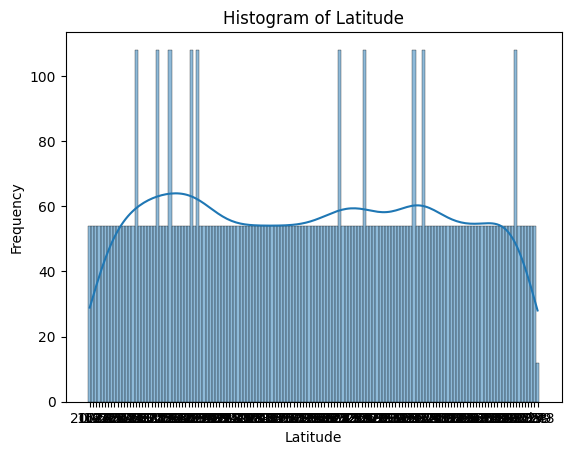

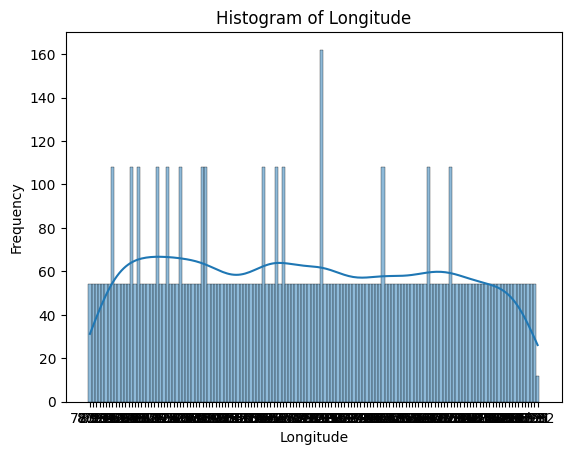

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
astro_data = pd.read_csv("C:\\Users\\Subhradip Debray\\Downloads\\train\\astro_data.csv")
forecast_data = pd.read_csv("C:\\Users\\Subhradip Debray\\Downloads\\train\\forecast_data.csv")
location_data = pd.read_csv("C:\\Users\\Subhradip Debray\\Downloads\\train\\location_data.csv")

# Print column names of forecast_data
print(forecast_data.columns)

# Example plots for astro_data
# Histogram for sunrise
sns.histplot(astro_data["sunrise"], kde=True)
plt.title("Histogram of Sunrise Times")
plt.xlabel("Sunrise Time")
plt.ylabel("Frequency")
plt.show()

# Histogram for moonrise
sns.histplot(astro_data["moonrise"], kde=True)
plt.title("Histogram of Moonrise Times")
plt.xlabel("Moonrise Time")
plt.ylabel("Frequency")
plt.show()

# Histogram for forecast_data
# Step 1: Check for non-numeric values
non_numeric_values = forecast_data["temp_c"].loc[~forecast_data["temp_c"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_values)

# Step 2: Convert the column to numeric
forecast_data["temp_c"] = pd.to_numeric(forecast_data["temp_c"], errors='coerce')

# Step 3: Handle missing or invalid values
forecast_data["temp_c"].fillna(0, inplace=True)  # Replace missing values with 0 or any other suitable value

# Now, try creating the histogram plot again
sns.histplot(forecast_data["temp_c"], kde=True)
plt.title("Histogram of Temperature (Celsius)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Frequency")
plt.show()

# Step 1: Check for non-numeric values in precipitation column
non_numeric_values_precip = forecast_data["precip_mm"].loc[~forecast_data["precip_mm"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_values_precip)

# Step 2: Convert the precipitation column to numeric
forecast_data["precip_mm"] = pd.to_numeric(forecast_data["precip_mm"], errors='coerce')

# Step 3: Handle missing or invalid values for precipitation
forecast_data["precip_mm"].fillna(0, inplace=True)  # Replace missing values with 0 or any other suitable value

# Now, create the histogram plot for precipitation in mm
sns.histplot(forecast_data["precip_mm"], kde=True)
plt.title("Histogram of Precipitation (mm)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


# Histogram for location_data
# Latitude
sns.histplot(location_data["lat"], kde=True)
plt.title("Histogram of Latitude")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()

# Longitude
sns.histplot(location_data["lon"], kde=True)
plt.title("Histogram of Longitude")
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.show()


In [8]:
import json
print(forecast_data.head())
import json

# Function to extract the 'text' value from the JSON-like string
def extract_condition_text(x):
    try:
        condition_json = json.loads(x)
        return condition_json['text']
    except (json.JSONDecodeError, TypeError, KeyError):
        return None

# Apply the function to create the 'condition_text' column
forecast_data['condition_text'] = forecast_data['condition'].apply(extract_condition_text)

# Display the first few rows of the DataFrame with the new column
print(forecast_data.head())



   time_epoch              time  temp_c  temp_f  is_day condition  wind_mph  \
0  1716661800  26-05-2024 00:00    39.1   102.4       0     Clear      14.5   
1  1716665400  26-05-2024 01:00    38.6   101.4       0     Clear      17.4   
2  1716669000  26-05-2024 02:00    37.9   100.1       0     Clear      16.6   
3  1716672600  26-05-2024 03:00    36.8    98.2       0     Clear      15.0   
4  1716676200  26-05-2024 04:00    35.7    96.3       0     Clear      16.1   

   wind_kph  wind_degree wind_dir  ...  will_it_snow  chance_of_snow  vis_km  \
0      23.4          288      WNW  ...             0               0      10   
1      28.1          294      WNW  ...             0               0      10   
2      26.6          303      WNW  ...             0               0      10   
3      24.1          300      WNW  ...             0               0      10   
4      25.9          294      WNW  ...             0               0      10   

   vis_miles  gust_mph  gust_kph           s

In [9]:
weather_data.head()

time_epoch              time  temp_c  temp_f  is_day condition  wind_mph  \
0  1716661800  26-05-2024 00:00    39.1   102.4       0     Clear      14.5   
1  1716665400  26-05-2024 01:00    38.6   101.4       0     Clear      17.4   
2  1716669000  26-05-2024 02:00    37.9   100.1       0     Clear      16.6   
3  1716672600  26-05-2024 03:00    36.8    98.2       0     Clear      15.0   
4  1716676200  26-05-2024 04:00    35.7    96.3       0     Clear      16.1   

   wind_kph  wind_degree wind_dir  ...  will_it_snow  chance_of_snow  vis_km  \
0      23.4          288      WNW  ...             0               0      10   
1      28.1          294      WNW  ...             0               0      10   
2      26.6          303      WNW  ...             0               0      10   
3      24.1          300      WNW  ...             0               0      10   
4      25.9          294      WNW  ...             0               0      10   

   vis_miles  gust_mph  gust_kph           state       city  snow_cm  uv  
0          6      22.1      35.6  Andhra Pradesh  Amaravati      0.0   1  
1          6      25.1      40.4  Andhra Pradesh  Amaravati      0.0   1  
2          6      22.5      36.1  Andhra Pradesh  Amaravati      0.0   1  
3          6      20.7      33.3  Andhra Pradesh  Amaravati      0.0   1  
4          6      22.0      35.4  Andhra Pradesh  Amaravati      0.0   1  

[5 rows x 36 columns]

In [10]:
# Many columns are same just with differnt units, for ex wind_mph and wind_kph. So, it's better to remove the redundancy
redundant_columns = ['temp_f', 'wind_kph', 'pressure_in', 'precip_in', 'feelslike_f', 'windchill_f', 'heatindex_f', 'dewpoint_f', 'vis_miles', 'chance_of_rain', 'chance_of_snow','gust_kph']

# Drop the redundant information
weather_data.drop(redundant_columns, axis=1, inplace=True)

# EDA

In [11]:
weather_data.head()

time_epoch              time  temp_c  is_day condition  wind_mph  \
0  1716661800  26-05-2024 00:00    39.1       0     Clear      14.5   
1  1716665400  26-05-2024 01:00    38.6       0     Clear      17.4   
2  1716669000  26-05-2024 02:00    37.9       0     Clear      16.6   
3  1716672600  26-05-2024 03:00    36.8       0     Clear      15.0   
4  1716676200  26-05-2024 04:00    35.7       0     Clear      16.1   

   wind_degree wind_dir  pressure_mb  precip_mm  ...  heatindex_c  dewpoint_c  \
0          288      WNW          996        0.0  ...         38.6        12.0   
1          294      WNW          995        0.0  ...         37.9        11.7   
2          303      WNW          996        0.0  ...         37.3        12.1   
3          300      WNW          996        0.0  ...         36.4        12.9   
4          294      WNW          997        0.0  ...         35.6        13.7   

   will_it_rain  will_it_snow  vis_km  gust_mph           state       city  \
0             0             0      10      22.1  Andhra Pradesh  Amaravati   
1             0             0      10      25.1  Andhra Pradesh  Amaravati   
2             0             0      10      22.5  Andhra Pradesh  Amaravati   
3             0             0      10      20.7  Andhra Pradesh  Amaravati   
4             0             0      10      22.0  Andhra Pradesh  Amaravati   

   snow_cm  uv  
0      0.0   1  
1      0.0   1  
2      0.0   1  
3      0.0   1  
4      0.0   1  

[5 rows x 24 columns]

In [12]:
# Visualise various continuous distributions
continuous_distributions = ['temp_c', 'wind_mph', 
                            'wind_degree', 'pressure_mb', 
                            'precip_mm', 'humidity', 
                            'feelslike_c', 'windchill_c', 
                            'heatindex_c', 'dewpoint_c', 
                            'vis_km', 'gust_mph']

plt.figure(figsize=(18, 16))
for i, dist_col in enumerate(continuous_distributions):

  # Create subplots
  plt.subplot(3, 4, i+1)
  sns.histplot(weather_data[dist_col])
  plt.title(dist_col + " Distribution")

**precip_mm columns graph looks empty, lets plot again after altering xticks**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.style.use('Solarize_Light2')

# Create a wider figure
plt.figure(figsize=(12, 8))

# Plot the histogram
weather_data['precip_mm'].hist(bins=25, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Histogram of Precipitation (mm)", fontsize=16)
plt.xlabel("Precipitation (mm)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize ticks and grid
plt.xticks(np.arange(0, 21, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Precipitation'], loc='upper right', fontsize=12)

# Show plot
plt.show()


In [ ]:
# Plotting categorical discrete variables

# 1. Plotting days and nights count
plt.figure(figsize=(8,6))
sns.countplot(data=weather_data, x='is_day')
plt.show()


In [ ]:
weather_data['condition'].value_counts().sort_values().plot(kind='barh', figsize=(10,8))
plt.xlabel("Weather Conditions")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
weather_data['wind_dir'].value_counts().sort_values().plot(kind='bar', figsize=(10,8))
plt.xlabel("Wind Direction")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
# Plot state distribution
weather_data['state'].value_counts().sort_values().plot(kind='barh', figsize=(10,8))
plt.xlabel("Frequency")
plt.ylabel("State")
plt.show()

In [ ]:
# Plot the count of rainy forecasts
sns.countplot(data=weather_data, x='will_it_rain')
plt.show()

In [ ]:
# Plot the count of snow forecasts
sns.countplot(data=weather_data, x='will_it_snow')
plt.show()

**No forecasts of snow in the past 7 days in the country**

In [ ]:
# Drop the snow column as it has constant variance
weather_data.drop(['will_it_snow'], axis=1, inplace=True)

In [ ]:
# Group the data by states
grouped_state_data = weather_data.groupby('state')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your weather data
weather_data = pd.read_csv("forecast_data.csv")

# State-wise analysis: calculating the mean temperature for each state
state_data = weather_data.groupby('state')['temp_c'].mean().reset_index()

# Sorting the data by temperature for a better visual representation
state_data_sorted = state_data.sort_values(by='temp_c')

# Plotting each state's mean temperature in degrees Celsius
plt.figure(figsize=(12, 8))
plt.barh(y=state_data_sorted['state'], width=state_data_sorted['temp_c'])
plt.xlabel("Temperature in degree Celsius")
plt.ylabel("State")
plt.title("Mean Temperature by State")
plt.show()


In [ ]:
# store the name of the states in a list and sort them alphabetically
states = [state for state in weather_data['state'].value_counts().index]
states.sort()

In [ ]:
continuous_distributions.append('will_it_rain')
continuous_distributions.append('cloud')

In [ ]:
columns_to_analyze_1 = continuous_distributions
columns_to_analyze_2 = ['condition', 'wind_dir']

In [ ]:
def statewise_data_analysis(columns_to_analyze_1, columns_to_analyze_2):

  label_map = ['Day {}'.format(i) for i in range(1, 15)]
  ticks = [i for i in range(1,15)]

  # Plotting average daily distributions from 15/10/2021-22/10/2021

  for i in range(len(states)):

    # Perform analysis for each state
    state = states[i]
    state_i_data = grouped_state_data.get_group(state)
    state_i_data['time'] = pd.to_datetime(state_i_data['time'])

    print("=========================================================================={}'s ANALYSIS=================================================================================".format(state.upper()))
    print()

    # Exclude 'time' column
    columns_to_analyze_1 = [col for col in continuous_distributions if col != 'time']

    # Group the data by time and calculate the mean of the other columns
    time_data = state_i_data.groupby('time')[columns_to_analyze_1].mean()

    # Plot the daily average of all the continuous distributions and numerical variable
    plt.figure(figsize=(25, 25))
    for i, col in enumerate(columns_to_analyze_1):
      plt.subplot(7, 2, i + 1)
      plt.plot(time_data[col])
      #plt.xticks(rotation=-45)
      plt.xlabel("Date")
      plt.ylabel(col)
    plt.show()

    # Plotting categorical variable across states
    plt.figure(figsize=(25, 12))
    for j in range(len(columns_to_analyze_2)):
      plt.subplot(1, 2, j+1)
      curr_column = columns_to_analyze_2[j]
      data_to_plot = state_i_data[curr_column].value_counts().sort_values()
      plt.barh(y=data_to_plot.index, width=data_to_plot.values)
      plt.xlabel("Frequency")
      plt.ylabel(curr_column)
    plt.show()
    
    print("====================================================================================================================================================================================".format(state.upper()))
    print()

# call the function
statewise_data_analysis(columns_to_analyze_1, columns_to_analyze_2)


In [ ]:
import pandas as pd
import numpy as np
file_path = 'C:/Users/Subhradip Debray/Downloads/train/forecast_data.csv'  # Replace with your actual file path
weather_data = pd.read_csv(file_path)
non_numeric_cols = weather_data.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')
non_numeric_cols_after_conversion = weather_data.select_dtypes(exclude=[np.number]).columns
numeric_cols = weather_data.select_dtypes(include=[np.number])
if 'will_it_rain' in weather_data.columns:
    numeric_cols = numeric_cols.drop(columns=['will_it_rain'])
mean_values = numeric_cols.groupby(weather_data['will_it_rain']).mean()
pd.set_option('display.width', 1900)
print(mean_values)


**From the above table, 'cloud' seems to be the feature which is makes a significant impact on predicting weather it will rain or not. (Which is quite logical).**

In [ ]:
columns_to_analyze_3 = list(weather_data.groupby('will_it_rain').mean().columns)
columns_to_analyze_3.remove('time_epoch')

In [ ]:
# Analysizng features and their dependence on predicting whether it will rain or not for each state
def statewise_rain_factor_analysis(columns_to_analyze_3):

  # Plotting boxplots for the feature 'will_it_rain' against the average of all other continuous features for each state

  for i in range(len(states)):

    # Perform analysis for each state
    state = states[i]
    state_i_data = grouped_state_data.get_group(state)

    print("=========================================================================={}'s ANALYSIS=================================================================================".format(state.upper()))
    print()

    plt.figure(figsize=(25, 25))
    for i, col in enumerate(columns_to_analyze_3):
      plt.subplot(7, 2, i + 1)
      sns.boxplot(data=state_i_data, x='will_it_rain', y=col)
      #plt.xticks(rotation=-45)
      plt.xlabel("Will it Rain 0 : No ; 1 : Yes")
      plt.ylabel(col)
    plt.show()
    
    print("====================================================================================================================================================================================".format(state.upper()))
    print()

# Call the above function
statewise_rain_factor_analysis(columns_to_analyze_3)

**Statewise analysis of factors shows a more granular approach on finding relation between features and the chances of raining.**

In [ ]:
continuous_distributions

In [ ]:
continuous_distributions.remove('will_it_rain')

In [ ]:
continuous_distributions.remove('cloud')

In [ ]:
# Plotting scatter plots

'''Plotting each continuous distribution against every other continuous distribution'''
weather_data[continuous_distributions].head()
for i in range(len(continuous_distributions)):

  if i != len(continuous_distributions)-1:
    curr_column = continuous_distributions[i]
    print("================================================= {} SCATTER PLOT ===================================================".format(curr_column))
    print()
    num_rows = len(continuous_distributions) - i
    for j in range(i+1, len(continuous_distributions)):
      next_column = continuous_distributions[j]
      plt.figure(figsize=(8,6))
      sns.scatterplot(data=weather_data, x=curr_column, y=next_column)
      plt.show()
    print("=======================================================================================================================")
    print()

**Multicollinearity can be observed**

In [ ]:
# PLot the correlation heatmap
corr_matrix = weather_data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

In [ ]:
weather_data.head()

# Data Preprocessing

In [ ]:
# Encode the categorical text values
cols_to_encode = ['condition', 'wind_dir', 'state', 'city']
for col in cols_to_encode:
  le = LabelEncoder()
  weather_data[col] = le.fit_transform(weather_data[col])

In [ ]:
weather_data.head()

In [ ]:
# drop the time column
weather_data.drop('time', axis=1, inplace=True)

In [ ]:
# Scale the data
X = weather_data.drop('will_it_rain', axis=1)
y = weather_data['will_it_rain']

X_columns = X.columns
ss = StandardScaler()
X_scaled_arr = ss.fit_transform(X)

# Create a new dataframe called X_scaled
X_scaled = pd.DataFrame(X_scaled_arr, columns=X_columns)

In [ ]:
X_scaled.head()

# Feature Selection

In [ ]:
# Using recursive feature elimination to select optimal number of features

# Using an ensemble model like Random Forest to use as the model.

'''
Q. How to select a model for using RFE?
A. One approach, use a model that offers scoring of features, like feature_importances_ in Random Forest.
'''

rfe_model = RandomForestClassifier()
rfe = RFE(rfe_model, verbose=3)
X_rfe = rfe.fit_transform(X_scaled, y)

In [ ]:
# Extract the important features
feature_series = pd.Series(rfe.support_, index=X_columns)
important_features = list(feature_series[feature_series == True].index)

In [ ]:
print(important_features)

In [ ]:
# Prepare the final dataset
X_final = X_scaled[important_features]

# Classification

## Classification using ML techniques

In [ ]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [ ]:
'''
Chosing Metric:
The problem is on a given day, predict whether it will rain or not. 
Hence, in this case the priority should be reduce the number of False Negatives or reduce the type II error.

So, in this case Recall should be the ideal metric that should be optimised.

Recall = TP/(TP + FN) where, TP: True Positives ; FN: False Negatives
'''

# We are going to chose a model which gives maximum recall, in case of tie we are going to see which one gives maximum TPs.

# 1. Compute Recall Score
def compute_recall_score(model_dict, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

  model_name = list(model_dict.keys())[0]
  model_obj = list(model_dict.values())[0]

  # Make predictions

  # 1. Training predictions
  train_preds = model_obj.predict(X_train)

  # 2. Testing predictions
  test_preds = model_obj.predict(X_test)

  # Compute Recall Score

  # 1. Training Score
  train_recall = recall_score(y_train, train_preds)

  # 2. Testing score
  test_recall = recall_score(y_test, test_preds)

  # Display the result
  result_arr = np.array([train_recall, test_recall])
  result_df = pd.DataFrame(data = result_arr.reshape(1,2), columns = ['Train_Recall', 'Test_Recall'], index=[model_name])

  return result_df

# Plot the Confusion Matrix
def plot_confusion_matrix(model_dict, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

  model_name = list(model_dict.keys())[0]
  model_obj = list(model_dict.values())[0]

  # Make predictions

  # 1. Training predictions
  train_preds = model_obj.predict(X_train)

  # 2. Testing predictions
  test_preds = model_obj.predict(X_test)

  # Compute Recall Score

  # 1. Training Score
  train_recall = confusion_matrix(y_train, train_preds)

  # 2. Testing score
  test_recall = confusion_matrix(y_test, test_preds)

  # Plot the heatmap
  fig, ax = plt.subplots(1, 2, figsize=(15,8))

  # PLot the trainig matrix
  sns.heatmap(train_recall, annot=True, cbar=False, ax=ax[0], fmt='g')
  ax[0].set_xlabel("Predicted Values")
  ax[0].set_ylabel("Actual Values")
  ax[0].set_title("Training Set Results")

  # Plot the testing matrix
  sns.heatmap(test_recall, annot=True, cbar=False, ax=ax[1], fmt='g')
  ax[1].set_xlabel("Predicted Values")
  ax[1].set_ylabel("Actual Values")
  ax[1].set_title("Testing Set Results")

  fig.show()

In [ ]:
# 1. Baseline Model -> KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'KNN' : knn_clf}
knn_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
knn_results

In [ ]:
# 2. Logistic Regression
lr_clf = LogisticRegressionCV()
lr_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'LogisticRegression' : lr_clf}
lr_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
lr_results

**Logistic Regression seem to perform very poor**

In [ ]:
# 3. Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'DecisionTree' : dt_clf}
dt_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
dt_results

**Overfitting can be observed in case of Decision Trees**

In [ ]:
# 4. SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'SVM' : svm_clf}
svm_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
svm_results

In [ ]:
# 5. Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'RandomForest' : rf_clf}
rf_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
rf_results

In [ ]:
# 6. Extra Trees
ext_clf = ExtraTreesClassifier()
ext_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'ExtraTrees' : ext_clf}
ext_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
ext_results

In [ ]:
# 7. XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'XGBoost' : xgb_clf}
xgb_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
xgb_results

In [ ]:
# 8. LightGBM
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

# Compute Scores and plot confusion matrix
model_dict={'LightGBM' : lgbm_clf}
lgbm_results = compute_recall_score(model_dict=model_dict)
plot_confusion_matrix(model_dict=model_dict)

In [ ]:
lgbm_results

In [ ]:
# Concatenate the results
final_results = pd.concat((knn_results, lr_results, 
                           svm_results, dt_results, 
                           rf_results, ext_results, 
                           xgb_results, lgbm_results), axis=0).sort_values(by='Test_Recall', ascending=False)
final_results


1.   XGBoost and SVM are giving generalised results.
2.   Extra Trees, Decision Tree and Random Forest seem to overfit a little.


## Hyperparameter Tuning

**Tune the top 2 models i.e LightGBM and ExtraTrees**

In [ ]:
# 1. Light GBM
lgbm_params = {"num_leaves" : [31, 50, 70, 90, 110],
               "max_depth" : [10, 20, 30, 40, 50, 60],
               "learning_rate" : [0.1, 0.5, 1, 1.5, 2.0],
               "n_estimators" : [100, 150, 200, 250, 300, 350],
               "reg_alpha" : [0.0, 0.25, 0.50, 0.75, 1.0, 2.0],
               "reg_lambda" : [0.0, 0.25, 0.50, 0.75, 1.0, 2.0],
               "colsample_bytree" : [0.0, 0.25, 0.50, 0.75, 1.0]
               }

lgbm_clf_2 = LGBMClassifier()

# using randomised search cv
rf_lgbm_clf = RandomizedSearchCV(lgbm_clf_2, lgbm_params, n_iter=20, scoring='recall', n_jobs=-1, cv=3, verbose=3, random_state=0)
rf_lgbm_clf.fit(X_train, y_train)

In [ ]:
# Store the Best estimator
lgbm_best = rf_lgbm_clf.best_estimator_

# Generate Results
model_dict = {'LGBM_Tuned' : lgbm_best}
lgbm_best_results = compute_recall_score(model_dict)
plot_confusion_matrix(model_dict)

In [ ]:
lgbm_best_results

In [ ]:
# 2. Extra Trees
ext_params = { "max_depth" : [10, 20, 30, 40, 50, 60],
               "criterion" : ['gini', 'entropy'],
               "n_estimators" : [100, 150, 200, 250, 300, 350],
               "max_features" : ["auto", "sqrt", "log2"],
               "min_samples_split" : [2, 4, 6, 8, 10],
               "min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7],
               "bootstrap" : [True, False]
              }

ext_clf_2 = ExtraTreesClassifier()

# using randomised search cv
rf_ext_clf = RandomizedSearchCV(ext_clf_2, ext_params, n_iter=20, scoring='recall', n_jobs=-1, cv=3, verbose=3, random_state=0)
rf_ext_clf.fit(X_train, y_train)

In [ ]:
# Store the Best estimator
ext_best = rf_ext_clf.best_estimator_

# Generate Results
model_dict = {'ExtraTrees_Tuned' : ext_best}
ext_best_results = compute_recall_score(model_dict)
plot_confusion_matrix(model_dict)

In [ ]:
ext_best_results

In [ ]:
# Train the best light GBM model on the entire dataset
lgbm_best.fit(X_scaled, y)

In [ ]:
# Dump the Hyperparameter tunes LGBM model
model_file = './LightGBM.pkl'
pickle.dump(lgbm_best, open(model_file, 'wb'))